# Case Study : Questions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

#### Explaination:-So in this we will firstly correct the cities Location and then we will find the frequency of the cities occurring in the data frame which in turn gives us the cities which received funding maximum number of times.Now we will store the count of funding numbers of Bangalore, Mumbai, NCR (Gurgaon, Noida and New Delhi).

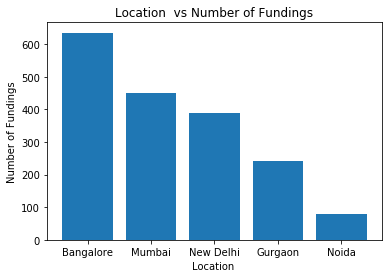

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


In [2]:
def f(s):
    return s.split('/')[0].strip()
#reading csvfile
df=pd.read_csv("Datasets/startup_funding.csv")

#droping nan values from citylocation
df["CityLocation"].dropna(inplace = True)

#seperating the cities and keeping the indian city
df["CityLocation"]=df["CityLocation"].apply(f)

#Replacing the Delhi to NewDelhi and bangalore to Bangalore as the question demand
df.replace("Delhi","New Delhi",inplace=True)
df.replace("bangalore","Bangalore",inplace=True)

# Counting the frequency cities which inturn gives the number of funding rounds and arranging it in descending order
z=df["CityLocation"].value_counts().sort_values(ascending=False)
cities=z.index
fundingnumbers=z.values

# Extracting the 5 cities in li which are needed
li=[]
for i in range(len(cities)):
    if (cities[i]=="Bangalore")or(cities[i]=="Mumbai")or(cities[i]=="Gurgaon")or(cities[i]=="Noida")or(cities[i]=="New Delhi"):
        li.append([cities[i],fundingnumbers[i]])
data=np.array(li)

# seperating the cities and funding rounds to arrays for making graphs
cities=data[:,0]
fundingnumbers=np.array(data[:,1],dtype=int)

# making bar graph
plt.bar(cities,fundingnumbers)
plt.xlabel("Location ")
plt.ylabel("Number of Fundings")
plt.title("Location  vs Number of Fundings")
plt.show()

# printing the cities with the funding Rounds
for i in range(len(cities)):
    print(cities[i],fundingnumbers[i])

### Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

#### Explaination:- So in this we will firstly drop the nan values from the Investor Name column and then we will make a dictionary which stores the investor name and the count of how many times the investor has invested. From the dictionary we will store the data in an array and will sort the array on the basis of the count in descending order and then we will extract the first 5 investor names which will be the top 5 investors

In [3]:
# making dictionary of investors and and the number of times the investor has invested in the companies
def makedict(array):
    d={}
    for string in array:
        li=string.strip().split(',')
        for i in li:
            z=i.strip()
            d[z]=d.get(z,0)+1
    return d

# reading the file
df=pd.read_csv("Datasets/startup_funding.csv")

# droping nan values from investorname
df["InvestorsName"].dropna(inplace=True)

# making dictionary of investors and and the number of times the investor has invested in the companies
dictionary=makedict(df["InvestorsName"].values)

# making the data in the form of list
data=[]
z=list(dictionary.values())
y=list(dictionary.keys())
for i in range(len(z)):
    data.append([z[i],y[i]])
    
# sorting the data on the basis of values of dictionary
data.sort(reverse=True)

# storing top5 investors and the number of times invested
top5investors=data[:5]

# print top5 investors and the number of invested
for row in top5investors:
    print(row[0],row[1])

64 Sequoia Capital
53 Accel Partners
44 Kalaari Capital
41 SAIF Partners
40 Indian Angel Network


### After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

#### Explaination:- So in this firstly we will fill the nan values of Investor name with “0” and then we will correct the StartupNames. Then we will make a dictionary so that no investor name and the startup name is repeated and by ignoring the undisclosed investors. We will store the investor name as the key and the count of number of fundings done by him/her in different startups as the values. From the dictionary we will store the data in an array and will sort the array on the basis of the count in descending order and then we will extract the first 5 investor names which will be the top 5 investors 

In [5]:
# making a dictionary of the count of investments an investor has done in different startups
def makeDictionary(startup,inverstors):
    d={}
    li=[]
    for i in range(len(startup)):
        investor=inverstors[i].split(",")
        for j in investor:
            if j=="0" or j=="" or j=="Undisclosed Investors" or j=="Undisclosed investors":
                continue
            j=j.strip()
            if (startup[i],j) in li:
                pass
            else:
                d[j]=d.get(j,0)+1
                li.append((startup[i],j))
    return d
        
# Reading csvfile
df=pd.read_csv("Datasets/startup_funding.csv")

# Replacing the nan values of investorsName with "0" 
df["InvestorsName"].fillna("0",inplace=True)

# Checking for the startupnames which are to be corrected
#s=set()
#for i in df["StartupName"]:
#    d=i.lower()
#    if ('ola' in d)or('flipkart' in d)or('oyo' in d)or('paytm' in d):
#        s.add(i)
#print(s)

# Correcting the startup Names
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)

# making a dictionary of the count of investments an investor has done in different startups
dictionary=makeDictionary(df["StartupName"].values,df["InvestorsName"].values)

# making the data in the form of list
data=[]
z=list(dictionary.values())
y=list(dictionary.keys())
for i in range(len(z)):
    data.append([z[i],y[i]])
    
# sorting the data on the basis of values of dictionary
data.sort(reverse=True)

# storing top5 investors and the number of times invested
top5investors=data[:5]

# print top5 investors and the number of invested
for row in top5investors:
    print(row[0],row[1])

48 Sequoia Capital
47 Accel Partners
41 Kalaari Capital
40 Indian Angel Network
36 Blume Ventures


### Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

#### Explaination:- So in this firstly we will fill the nan values of Investor name with “0” and then we will correct the StartupNames and the spelling of investment types. Then we will filter the data whose investment type is Seed Funding or Crowdfunding. Then we will make a dictionary so that no investor name and the startup name is repeated and by ignoring the undisclosed investors. We will store the investor name as the key and the count of number of fundings done by him/her in different startups as the values. From the dictionary we will store the data in an array and will sort the array on the basis of the count in descending order and then we will extract the first 5 investor names which will be the top 5 investors. 

In [6]:
# making a dictionary of the count of investments an investor has done in different startups
def makeDictionary(startup,inverstors):
    d={}
    li=[]
    for i in range(len(startup)):
        investor=inverstors[i].split(",")
        for j in investor:
            if j=="0" or j=="" or j=="Undisclosed Investors" or j=="Undisclosed investors":
                continue
            j=j.strip()
            if (startup[i],j) in li:
                pass
            else:
                d[j]=d.get(j,0)+1
                li.append((startup[i],j))
    return d
        
# Reading csvfile
df=pd.read_csv("Datasets/startup_funding.csv")

# Replacing the nan values of investorsName with "0" 
df["InvestorsName"].fillna("0",inplace=True)

# Checking for the startupnames which are to be corrected
#s=set()
#for i in df["StartupName"]:
#    d=i.lower()
#    if ('ola' in d)or('flipkart' in d)or('oyo' in d)or('paytm' in d):
#        s.add(i)
#print(s)

# Correcting the startup Names
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)

#print(df["InvestmentType"].value_counts())
df["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)
df["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
df["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)

# Extracting DataFrame where InvestmentType is Crowd Funding or Seed Funding
df=df[(df["InvestmentType"]=="Crowd Funding")|(df["InvestmentType"]=="Seed Funding")]

# making a dictionary of the count of investments an investor has done in different startups
dictionary=makeDictionary(df["StartupName"].values,df["InvestorsName"].values)

# making the data in the form of list
data=[]
z=list(dictionary.values())
y=list(dictionary.keys())
for i in range(len(z)):
    data.append([z[i],y[i]])
    
# sorting the data on the basis of values of dictionary
data.sort(reverse=True)

# storing top5 investors and the number of times invested
top5investors=data[:5]

# print top5 investors and the number of invested
for row in top5investors:
    print(row[0],row[1])

33 Indian Angel Network
23 Rajan Anandan
16 LetsVenture
16 Anupam Mittal
14 Kunal Shah


### Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm

#### Explaination:- So in this firstly we will fill the nan values of Investor name with “0” and then we will correct the StartupNames and the spelling of investment types. Then we will filter the data whose investment type is Private Equity. Then we will make a dictionary so that no investor name and the startup name is repeated and by ignoring the undisclosed investors. We will store the investor name as the key and the count of number of fundings done by him/her in different startups as the values. From the dictionary we will store the data in an array and will sort the array on the basis of the count in descending order and then we will extract the first 5 investor names which will be the top 5 investors. 

In [8]:
# making a dictionary of the count of investments an investor has done in different startups
def makeDictionary(startup,inverstors):
    d={}
    li=[]
    for i in range(len(startup)):
        investor=inverstors[i].split(",")
        for j in investor:
            if j=="0" or j=="" or j=="Undisclosed Investors" or j=="Undisclosed investors":
                continue
            j=j.strip()
            if (startup[i],j) in li:
                pass
            else:
                d[j]=d.get(j,0)+1
                li.append((startup[i],j))
    return d
        
# Reading csvfile
df=pd.read_csv("Datasets/startup_funding.csv")

# Replacing the nan values of investorsName with "0" 
df["InvestorsName"].fillna("0",inplace=True)

# Checking for the startupnames which are to be corrected
#s=set()
#for i in df["StartupName"]:
#    d=i.lower()
#    if ('ola' in d)or('flipkart' in d)or('oyo' in d)or('paytm' in d):
#        s.add(i)
#print(s)

# Correcting the startup Names
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)

#print(df["InvestmentType"].value_counts())
df["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)
df["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
df["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)

# Extracting DataFrame where InvestmentType is Private Equity
df=df[(df["InvestmentType"]=="Private Equity")]

# making a dictionary of the count of investments an investor has done in different startups
dictionary=makeDictionary(df["StartupName"].values,df["InvestorsName"].values)

# making the data in the form of list
data=[]
z=list(dictionary.values())
y=list(dictionary.keys())
for i in range(len(z)):
    data.append([z[i],y[i]])
    
# sorting the data on the basis of values of dictionary
data.sort(reverse=True)

# storing top5 investors and the number of times invested
top5investors=data[:5]

# print top5 investors and the number of invested
for row in top5investors:
    print(row[0],row[1])

45 Sequoia Capital
43 Accel Partners
35 Kalaari Capital
27 Blume Ventures
24 SAIF Partners
